In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df_go = pd.read_csv('pokemonGO.csv')
spawn_clean =pd.read_csv("spawn_clean.csv")
df_go.head()

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


In [106]:
spawns.head()

,level_0,index,Pokemon No.,Name,lat,lng,encounter_ms,disppear_ms,appearance_s
0,0,0,13,Weedle,37.793592,-122.408721,1469520187732,1469519919988,267.744
1,1,1,16,Pidgey,37.794746,-122.406420,1469520297172,1469519919992,377.180
2,2,2,41,Zubat,37.794999,-122.404384,1469520709924,1469519919991,789.933
3,3,4,60,Poliwag,37.795592,-122.406331,1469520741876,1469519920153,821.723
4,4,5,50,Diglett,37.301129,-122.048453,1469520163692,1469520120130,43.562


In [107]:
print df_go.info()
print '---------------------------'
print spawns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
Pokemon No.    151 non-null int64
Name           151 non-null object
Type 1         151 non-null object
Type 2         67 non-null object
Max CP         151 non-null int64
Max HP         151 non-null int64
Image URL      151 non-null object
dtypes: int64(3), object(4)
memory usage: 8.3+ KB
None
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 293137 entries, 0 to 293136
Data columns (total 9 columns):
level_0         293137 non-null int64
index           293137 non-null int64
Pokemon No.     293137 non-null int64
Name            293137 non-null object
lat             293137 non-null float64
lng             293137 non-null float64
encounter_ms    293137 non-null int64
disppear_ms     293137 non-null int64
appearance_s    293137 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 22.4+ MB
None


In [108]:
# There are NaN values for type 2 so we fill in a description saying that theres no type 2
df_go = df_go.fillna('No_Type_2')

In [109]:
del df_go['Image URL'] # get rid of image URL

In [110]:
df_go.describe()

,Pokemon No.,Max CP,Max HP
count,151.000000,151.000000,151.000000
mean,76.000000,1637.291391,113.350993
std,43.734045,755.261726,45.297417
min,1.000000,264.000000,27.000000
25%,38.500000,1001.500000,83.000000
50%,76.000000,1594.000000,107.000000
75%,113.500000,2170.500000,138.000000
max,151.000000,4174.000000,408.000000


In [111]:
df_go['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Bug         12
Grass       12
Fire        12
Rock         9
Electric     9
Ground       8
Psychic      8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [112]:
df_go['Type 2'].value_counts()

No_Type_2    84
Poison       19
Flying       19
Ground        6
Psychic       6
Water         4
Fairy         3
Ice           3
Rock          2
Grass         2
Steel         2
Fighting      1
Name: Type 2, dtype: int64

In [113]:
pokemon = df_go.merge(spawn_clean, how = 'left', on=['Pokemon No.', 'Name'])

## Most common Pokemon

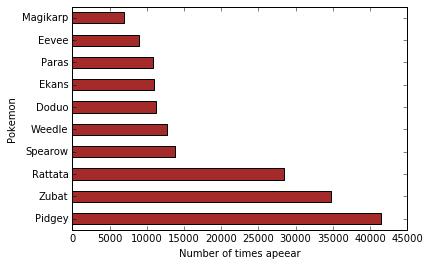

In [114]:
ax = pokemon['Name'].value_counts().head(10).plot(kind='barh', color='brown')
ax.set(xlabel = 'Number of times apeear', ylabel='Pokemon')
plt.show()

## How different types of Pokemon fair against each other

In [115]:
df_go[df_go['Max HP'] == df_go['Max HP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP
112,113,Chansey,Normal,No_Type_2,679,408


<img src='http://cdn.bulbagarden.net/upload/thumb/c/cd/113Chansey.png/250px-113Chansey.png'>

In [116]:
df_go[df_go['Max CP'] == df_go['Max CP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP
149,150,Mewtwo,Psychic,No_Type_2,4174,180


<img src = 'http://cdn.bulbagarden.net/upload/thumb/7/78/150Mewtwo.png/250px-150Mewtwo.png'>

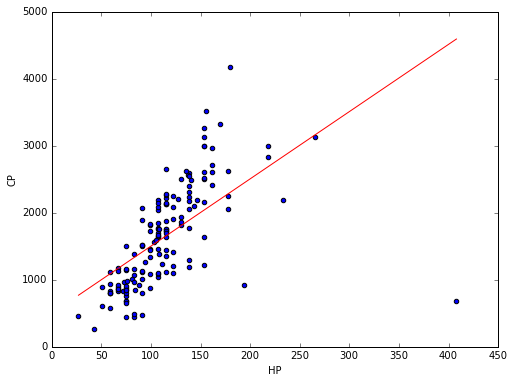

In [117]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df_go['Max HP'], df_go['Max CP'])
ax.plot(np.unique(df_go['Max HP']), np.poly1d(np.polyfit(df_go['Max HP'], df_go['Max CP'], 1))(np.unique(df_go['Max HP'])), color = 'red')
ax.set(xlabel = 'HP', ylabel = 'CP')
plt.show()

In [118]:
pokemon.groupby("Name").filter(lambda x: len(x) == 1)

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,lat,lng,encounter_ms,disppear_ms,appearance_s
3712,9,Blastoise,Water,No_Type_2,2560,137,NaN,NaN,NaN,NaN,NaN
250683,94,Gengar,Ghost,Poison,2093,107,NaN,NaN,NaN,NaN,NaN
263796,115,Kangaskhan,Normal,No_Type_2,2057,178,NaN,NaN,NaN,NaN,NaN
271987,122,Mr. Mime,Psychic,Fairy,1505,75,NaN,NaN,NaN,NaN,NaN
282204,131,Lapras,Water,Ice,3002,218,NaN,NaN,NaN,NaN,NaN
282205,132,Ditto,Normal,No_Type_2,926,88,NaN,NaN,NaN,NaN,NaN
291744,141,Kabutops,Rock,Water,2145,107,NaN,NaN,NaN,NaN,NaN
291793,144,Articuno,Ice,Flying,2999,154,NaN,NaN,NaN,NaN,NaN
291794,145,Zapdos,Electric,Flying,3136,154,NaN,NaN,NaN,NaN,NaN
291795,146,Moltres,Fire,Flying,3263,154,NaN,NaN,NaN,NaN,NaN


In [135]:
few = pokemon.groupby("Name").filter(lambda x: len(x) == 2)
few

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,lat,lng,encounter_ms,disppear_ms,appearance_s
182562,45,Vileplume,Grass,Poison,2510,130,35.701980,139.826538,1.469558e+12,1.469557e+12,826.453
182563,45,Vileplume,Grass,Poison,2510,130,35.701980,139.826538,1.469558e+12,1.469557e+12,826.327
249568,89,Muk,Poison,No_Type_2,2621,178,37.781209,-122.208082,1.469528e+12,1.469528e+12,647.515
249569,89,Muk,Poison,No_Type_2,2621,178,37.781209,-122.208082,1.469528e+12,1.469528e+12,647.369
291522,139,Omastar,Rock,Water,2249,122,37.484309,-122.232019,1.469556e+12,1.469555e+12,887.522
291523,139,Omastar,Rock,Water,2249,122,37.484309,-122.232019,1.469556e+12,1.469555e+12,887.443


<img src ='http://cdn.bulbagarden.net/upload/thumb/6/6a/045Vileplume.png/250px-045Vileplume.png'>
<img src = 'http://cdn.bulbagarden.net/upload/thumb/7/7c/089Muk.png/250px-089Muk.png'>
<img src='http://cdn.bulbagarden.net/upload/thumb/4/43/139Omastar.png/250px-139Omastar.png'>

In [137]:
few.appearance_s.mean()

787.1048333333333

In [120]:
df_go['have_type_2'] = df_go['Type 2'].map({'No_Type_2':'One Type'})

In [121]:
df_go = df_go.fillna('Two Types')

In [122]:
df_go.groupby(['Type 1', 'have_type_2'])['Max HP'].mean()

Type 1    have_type_2
Bug       One Type        96.333333
          Two Types      100.555556
Dragon    One Type        92.000000
          Two Types      156.000000
Electric  One Type        97.666667
          Two Types       98.666667
Fairy     One Type       142.000000
Fighting  One Type       112.285714
Fire      One Type       106.400000
          Two Types      144.500000
Ghost     Two Types       83.000000
Grass     One Type       115.000000
          Two Types      114.636364
Ground    One Type        85.500000
          Two Types      158.000000
Ice       Two Types      134.500000
Normal    One Type       148.750000
          Two Types      121.400000
Poison    One Type       109.300000
          Two Types      124.750000
Psychic   One Type       118.285714
          Two Types       75.000000
Rock      Two Types       96.888889
Water     One Type        98.500000
          Two Types      141.500000
Name: Max HP, dtype: float64

## What pokemon appear most frequently near SF Bay?

In [123]:
pokemon['Name'].value_counts().head(10)

Pidgey      41484
Zubat       34713
Rattata     28495
Spearow     13791
Weedle      12762
Doduo       11197
Ekans       11014
Paras       10867
Eevee        9008
Magikarp     6922
Name: Name, dtype: int64

In [124]:
few = pokemon.groupby("Name").filter(lambda x: len(x) == 2)
few

In [125]:
few

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,lat,lng,encounter_ms,disppear_ms,appearance_s
182562,45,Vileplume,Grass,Poison,2510,130,35.701980,139.826538,1.469558e+12,1.469557e+12,826.453
182563,45,Vileplume,Grass,Poison,2510,130,35.701980,139.826538,1.469558e+12,1.469557e+12,826.327
249568,89,Muk,Poison,No_Type_2,2621,178,37.781209,-122.208082,1.469528e+12,1.469528e+12,647.515
249569,89,Muk,Poison,No_Type_2,2621,178,37.781209,-122.208082,1.469528e+12,1.469528e+12,647.369
291522,139,Omastar,Rock,Water,2249,122,37.484309,-122.232019,1.469556e+12,1.469555e+12,887.522
291523,139,Omastar,Rock,Water,2249,122,37.484309,-122.232019,1.469556e+12,1.469555e+12,887.443


<img src ='http://cdn.bulbagarden.net/upload/thumb/6/6a/045Vileplume.png/250px-045Vileplume.png'>
<img src = 'http://cdn.bulbagarden.net/upload/thumb/7/7c/089Muk.png/250px-089Muk.png'>
<img src='http://cdn.bulbagarden.net/upload/thumb/4/43/139Omastar.png/250px-139Omastar.png'>

In [126]:
few.appearance_s.mean()

787.1048333333333

In [127]:
pokemon.groupby("Name").filter(lambda x: len(x) == 1)

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,lat,lng,encounter_ms,disppear_ms,appearance_s
3712,9,Blastoise,Water,No_Type_2,2560,137,NaN,NaN,NaN,NaN,NaN
250683,94,Gengar,Ghost,Poison,2093,107,NaN,NaN,NaN,NaN,NaN
263796,115,Kangaskhan,Normal,No_Type_2,2057,178,NaN,NaN,NaN,NaN,NaN
271987,122,Mr. Mime,Psychic,Fairy,1505,75,NaN,NaN,NaN,NaN,NaN
282204,131,Lapras,Water,Ice,3002,218,NaN,NaN,NaN,NaN,NaN
282205,132,Ditto,Normal,No_Type_2,926,88,NaN,NaN,NaN,NaN,NaN
291744,141,Kabutops,Rock,Water,2145,107,NaN,NaN,NaN,NaN,NaN
291793,144,Articuno,Ice,Flying,2999,154,NaN,NaN,NaN,NaN,NaN
291794,145,Zapdos,Electric,Flying,3136,154,NaN,NaN,NaN,NaN,NaN
291795,146,Moltres,Fire,Flying,3263,154,NaN,NaN,NaN,NaN,NaN


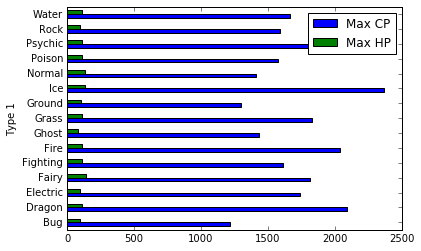

In [128]:
pd.pivot_table(df_go, index=['Type 1'], values=['Max CP', 'Max HP']).plot(kind='barh')

In [129]:
# Outlier

In [130]:
df_go[df_go['Max HP'] == df_go['Max HP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,have_type_2
112,113,Chansey,Normal,No_Type_2,679,408,One Type


<img src='http://cdn.bulbagarden.net/upload/thumb/c/cd/113Chansey.png/250px-113Chansey.png'>

In [131]:
df_go[df_go['Max CP'] == df_go['Max CP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,have_type_2
149,150,Mewtwo,Psychic,No_Type_2,4174,180,One Type


<img src = 'http://cdn.bulbagarden.net/upload/thumb/7/78/150Mewtwo.png/250px-150Mewtwo.png'>

In [132]:
pd.pivot_table(df_go, index=['Type 1','have_type_2'], values=['Max CP', 'Max HP'])

Max CP      Max HP
Type 1   have_type_2                         
Bug      One Type     1021.333333   96.333333
         Two Types    1284.888889  100.555556
Dragon   One Type     1375.000000   92.000000
         Two Types    3525.000000  156.000000
Electric One Type     1621.166667   97.666667
         Two Types    1975.333333   98.666667
Fairy    One Type     1811.500000  142.000000
Fighting One Type     1610.428571  112.285714
Fire     One Type     1860.300000  106.400000
         Two Types    2941.500000  144.500000
Ghost    Two Types    1431.000000   83.000000
Grass    One Type     1752.000000  115.000000
         Two Types    1834.454545  114.636364
Ground   One Type     1157.333333   85.500000
         Two Types    1724.500000  158.000000
Ice      Two Types    2363.500000  134.500000
Normal   One Type     1460.166667  148.750000
         Two Types    1356.900000  121.400000
Poison   One Type     1447.600000  109.300000
         Two Types    1894.000000  124.750000
Psychic  One Type     2049.571429  118.285714
         Two Types    1505.000000   75.000000
Rock     Two Types    1588.111111   96.888889
Water    One Type     1389.666667   98.500000
         Two Types    2164.700000  141.500000

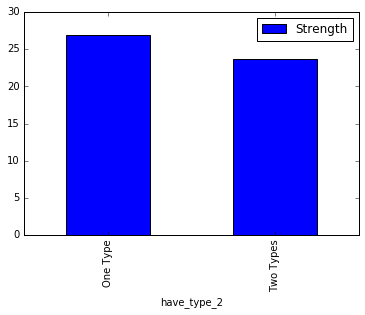

In [133]:
df_go['have_type_2'] = df_go['Type 2'].map({'No_Type_2':'One Type'})
df_go['have_type_2']=df_go['have_type_2'].fillna('Two Types')

 
max_hp = df_go['Max HP'].max()
max_cp = df_go['Max CP'].max()

df_go['Norm_Max CP'] = df_go['Max CP'] / max_cp
df_go['Norm_Max HP'] = df_go['Max HP'] / max_hp

 

df_go['have_type_2']=df_go['have_type_2'].astype('category')

df_go['Strength'] = (df_go['Norm_Max CP']+df_go['Norm_Max HP'])/2
 
pd.pivot_table(df_go, index=['have_type_2'], values=['Strength'], aggfunc=np.sum).plot(kind="bar")

In [134]:
pd.pivot_table(df_go, index=['have_type_2'], values=['Norm_Max CP','Norm_Max HP'], aggfunc=np.mean)

,Norm_Max CP,Norm_Max HP
have_type_2,,
One Type,0.368195,0.271359
Two Types,0.422430,0.285923
